Dropout在2012年的论文"Improving neural networks by preventing
co-adaptation of feature detectors"首次被提出，随后在2014年的论文"Dropout: A Simple Way to Prevent Neural Networks from
Overfitting"中被详细阐述。

dropout作为一种防止过拟合的方法，其原理是以一定的比例（drop_ratio）丢弃部分神经元，被丢弃的神经元其输入、输出的权值均被置0，不参与前向传播与反向传播。这样的效果是使feature detector(神经元)不过分依赖特定的几个神经元，防止过拟合。原理图如下：
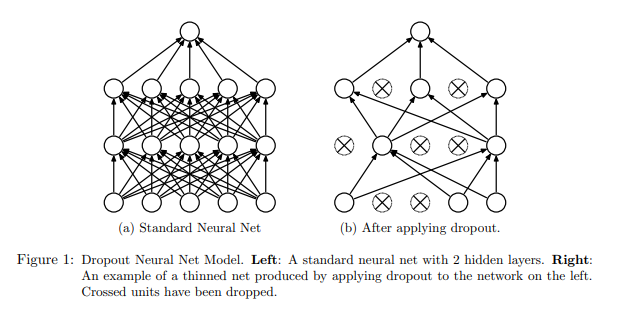

另一种解释是联合训练多个模型可防止过拟合，但代价太大，而使用dropout相当于每次都在训练不同的网络，同样达到了ensemble training的效果。

dropout在实现时是放在激活函数之后，一般是linear-relu-dropout的形式。dropout一般用于全连接层，卷积层用的较少。

dropout推导如下：<br/>
$标准的NN，其feed-forward operation描述如下：$<br/>
$$
z_i^{(l+1)} = w_i^{l+1}y^l + b_i^{(l+1)} \\
y_i^{(l+1)} = f(z_i^{(l+1)})
$$
$加上dropout，变为如下形式：$
$$
r_j^{(l)} \sim Bernoulli(p), \\
\tilde y^{(l)} = r^{(l)} * y^{(l)}, \\
z_i^{(l+1)} = w_i^{l+1}\tilde y^l + b_i^{(l+1)} \\
y_i^{(l+1)} = f(z_i^{(l+1)})
$$
$其中，Bernoulli()是伯努利分布，原理图如下：$
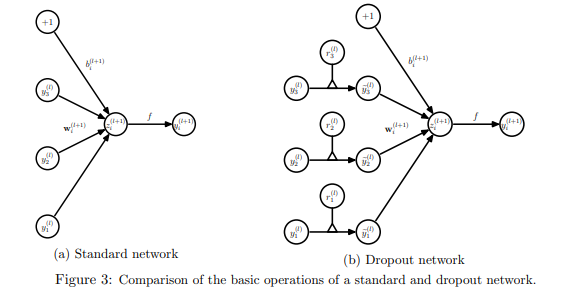

dropout在训练与测试时有所不同，训练时采用drop_ratio为p的dropout，每次随机丢弃部分神经元，但在测试时是使用全部神经元。但在测试时需要对使用dropout的神经元进行权重缩放，即权重乘以p:
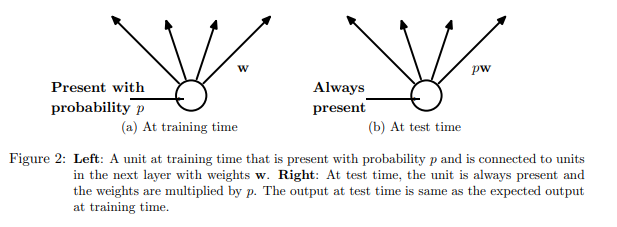
另一种补偿方法是不在测试时补偿，而是在训练时每个使用dropout的神经元，其输出权重乘以$\frac{1}{1-p}$

p是一个可调节的超参，但经过作者试验，p=0.5一般都有好的效果

dropout的motivation是进化论中的性别角色（theory of the role of sex）